In [1]:
import pandas as pd

Hey, welcome to ...
In this demo we're gonna see some data cleaning/cleansing and preprocessing steps in practice.

The data we're gonna be using is **median house prices for California districts derived from the 1990 census**. It's open source and widely used for educational purposes.  
The original data is fairly clean. I've actually made some modifications to the data to make it less clean so that I can illustrate some issues you'll encounter with real-world data.

It's really important to know the data and for that we need to read the documentation carefully.


1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `median_house_value`: Median house value for households within a block (measured in US Dollars)
10. `ocean_proximity`: Location of the house w.r.t ocean/sea


For illustration purposes, let's say we want to see if we can predict median house values from all the other data. So we can say `median_house_value` is our target and the other 9 columns are potential features. But we may or may not use all of them after we go thru feature selection.  
For now let's load the data first.


In [2]:
data = pd.read_csv("cali_housing_modified.csv")

In [3]:
# help(pd.read_csv)
# pd.read_csv?
# ?pd.read_csv

## Inspect the Data


First thing we wanna do is inspect the data for some preliminary santiy checking and just to get an idea of what we're dealing with.


In [4]:
data.shape

(20646, 10)

That matches our expectation of 10 columns. Also we now know that we have over 20,000 samples or examples.  
The very first and easiest cleaning step is dropping duplicates which we always wanna do. We can see how many duplicated records we have using the, well, `.duplicated()` method:


In [5]:
# get the number of duplicates
data.duplicated().sum()

np.int64(6)

Makes sense because I intentionally duplicated 6 rows for the purposes of this demo! Now let's remove them.


In [6]:
# TODO: Say "Don't forget the inplace=True or alternatively creat a new dataframe and assign it back to data"
data.drop_duplicates(inplace=True)  # or data = data.drop_duplicates()
data.shape

(20640, 10)

Let's take a quick look at the first 10 records using `.head()`. We can use `.tail()` for the _last_ few rows.


In [7]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,"$452,600",NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,"$358,500",NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,"$352,100",NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,"$341,300",NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,"$342,200",NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,"$269,700",NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,"$299,200",NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,"$241,400",NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,"$226,700",NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,"$261,100",NEAR BAY


Right off the bat we see a potential issue. Can you spot it? The median house values are formatted in dollars. So we'll have to convert them to numbers. In fact even when we try to get some basic statistics on the data we see this column is missing because pandas doesn't know how to calculate statistics on strings!


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,15.000100


This is a very common issue especially with dates for example, where you might be getting data from a source that uses a different datetime format and you end up having to do some data wrangling to get them in the right format.  
Btw another good way to check the format or types of data is using the dtypes property:


In [9]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households             object
median_income         float64
median_house_value     object
ocean_proximity        object
dtype: object

Whenever you see `object` that means the column is in a non-numerical format. We generally want some variant of `int` or `float` or `datetime`.  
Here we see potential issues in households, median_house_value, and ocean_proximity.  
Ocean proximity is a categorical feature and we'll talk about it in another demo where we discuss feature engineering. But let's get back to cleaning the other two.  
We know what's going on with median_house_value, so let's just fix it.


In [10]:
# Convert median_house_value from currency to float (remove $ and ,)
data["median_house_value"] = data["median_house_value"].str.replace(",", "")
data["median_house_value"] = data["median_house_value"].str.replace("$", "")
data["median_house_value"] = data["median_house_value"].astype(float)
# Or in one line:
# data['median_house_value'] = data['median_house_value'].str.replace(',', '').str.replace('$', '').astype(float)

And now if we look at the column it should be a number. This time I'm going to use a different method, the .info() method, which ourputs more details than dtypes:


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20645
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  object 
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 1.7+ MB


And sure enough, median house value is now a number. We can take a look at it with `.describe()` again just to make sure it was converted correctly.


In [12]:
data[
    "median_house_value"
].describe()  # or `data.median_house_value.describe()` because the column name has no spaces

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

It looks reasonable. Now let's focus on `households`. When we looked at the top few rows it looked fine. So what could be the problem? Let's check which rows in this column are not numbers:


In [13]:
# TODO: Explain the code below
data[~data["households"].str.isnumeric()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18,-122.26,37.84,50,2239,455.0,990,Unknown,1.9911,158700.0,NEAR BAY


Pandas automatically interprets some strings like "NaN", "Na" and blank strings as missing values. But here I manually changed the value in one row to the string `Unknown` to demonstrate the point that missing values can come in all shapes and forms.  
So what do we do with our missing value here? The answer really depends on domain knowledge. In practice, one missing row out of 20k is not really a big deal so we could just drop the one row.


In [15]:
# There are many ways to do this of course, but here's one:
data = data[data["households"].str.isnumeric()]
data["households"] = data["households"].astype(int)

Or after thinking about it, we might decide hey, the number of households in a district really has nothing to do with house prices in that district, in which case we'd to get rid of the _column_ altogether.  
Also if we had a _lot_ more data missing in the column and didn't have enough information to impute them confidently.


In [16]:
data_without_households = data.drop(
    columns=["households"]
)  # or data.drop(columns=['households'], inplace=True)
data_without_households.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

But speaking of missing values: did you notice something earlier when we used `.info()`? (**scroll up**)  
Looks like one of our columns has fewer non-null records than the others. Let's take a closer look with a dedicated method...


In [17]:
data.isna().sum()  # or data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Looks like we have 207 rows that are missing values for total_bedrooms. Can we replace them with zeros? Definitely not! First of all these are districts, not individual houses. It's very unlikely that a whole district has no bedrooms! And indeed if we take a peek...


In [18]:
data[data["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
291,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900.0,NEAR BAY
342,-122.17,37.75,38,992,NaN,732,259,1.6196,85100.0,NEAR BAY
539,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400.0,NEAR BAY
564,-122.24,37.75,45,891,NaN,384,146,4.9489,247100.0,NEAR BAY
697,-122.10,37.69,41,746,NaN,387,161,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20273,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500.0,NEAR OCEAN
20274,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400.0,NEAR OCEAN
20378,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700.0,<1H OCEAN
20466,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100.0,<1H OCEAN


We see that there are thousands of rooms. So we have to do something else. 207 is still a small percentage so we could drop the rows but we can be smarter about it. We can look at all the other data and infer what percentage of total rooms on average are bedrooms and fill these missing values that way or any number of other ways.  
Here I'll just show you how to impute them using a simple measure of central tendency like mean or median.


In [19]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(
    data["total_bedrooms"].median()
)  # or ...`.mean()`... etc.

And now we should have no missing values in the column:


In [20]:
data["total_bedrooms"].isna().sum()

np.int64(0)

As a side, another way to accomplish the same thing is by using the `SimpleImputer` class from scikit-learn. This will do exactly the same thing; the syntax and the way we use it that are different... and I'm gonna show you for reference how to do it...


In [ ]:
# # Don't actually run
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="median")
# imputer.fit(data[["total_bedrooms"]])
# data["total_bedrooms"] = imputer.transform(data[["total_bedrooms"]])

Now you may be saying that looks much more complicated, why would i ever do _that_?! Yes, this might look more complex but very importantly, SimpleImputer is a scikit-learn "estimator" and for those of you familiar with the concept of pieplines in scikit-learn, an estimator can become a component of a pipeline whereas the simple pandas way can't.  
But moving on to...

> ...*Another* important side note: we've just done something **very wrong** here which we'll talk about in the final video of this lesson, and that is that we have muddied the data and set outselves up for a type of data leakage called train-test contamination. What we **should** have done is perform imputation _after splitting the dataset into training and test sets_; so in other words, fill the missing values in the training set using the median of the values in the training set, and fill the missing values in the test set separately using the median of the values in the test set. But that's a topic of a future video so just keep it in mind until then!


Alright, finally let's talk about outliers. First off, always make sure an outlier is actually a real valid value! I've seen datasets where a specially large number like 999,999 was used to mean something specific about the row and how it should be treated, or -1 used to indicate missing values in a column that takes positive values otherwise.

But once we've established an outlier _is_ "real", whether it's really an _outlier_ is again one of those items that is a matter of opinion, domain knowledge and familiarity with the dataset.

But anyway, the best way to flag outliers IMO is using boxplots coz they actually show you the IQR and values that fall outside of it. Let's have a look at a single boxplot here...


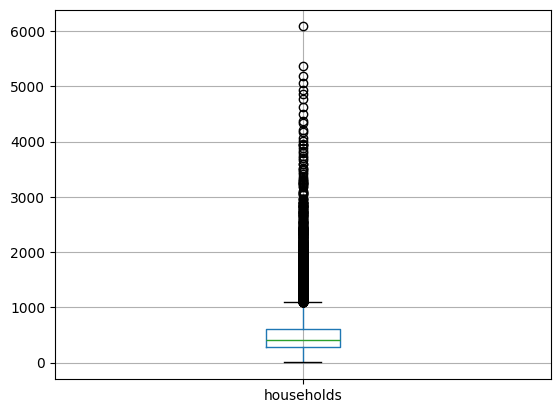

In [25]:
import matplotlib.pyplot as plt

data.boxplot("households")  # or data.households.plot.box()
plt.show()

You might be surprised by this but we have to view it in context, so let's take a look at the boxplots for all columns


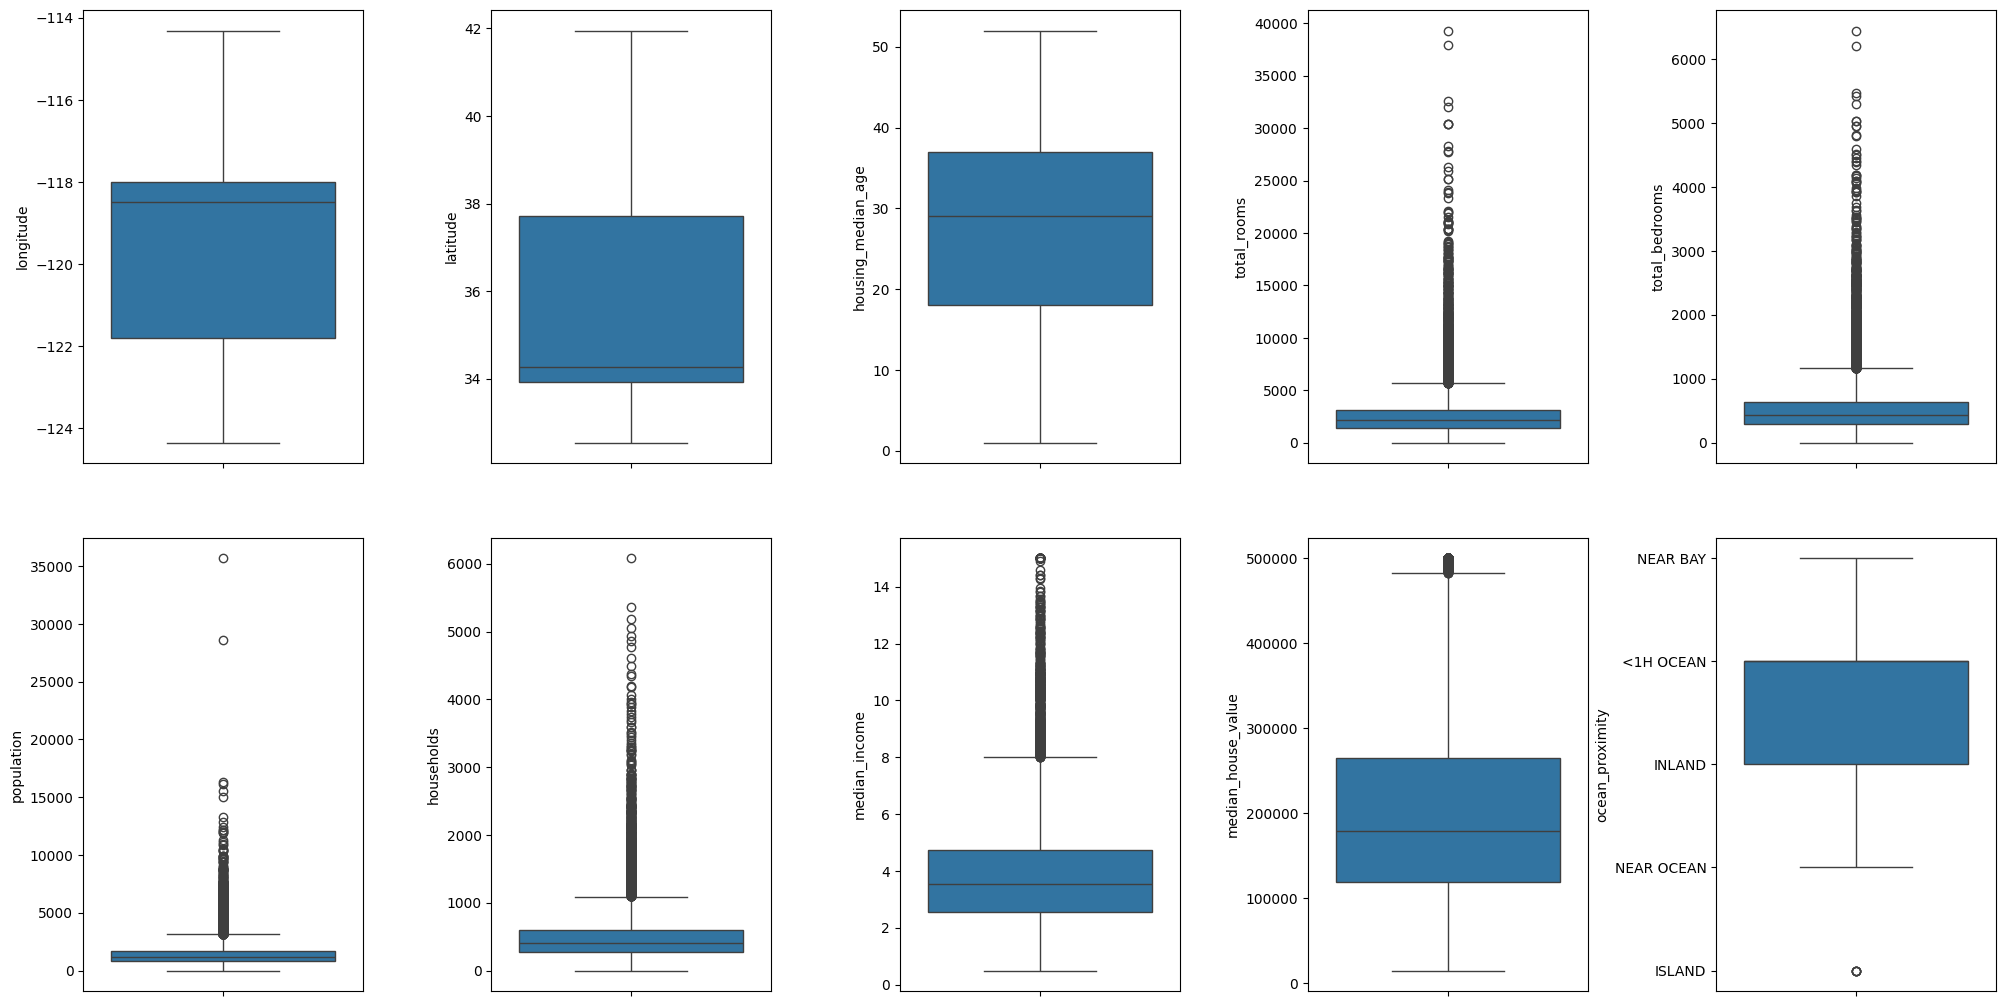

In [33]:
import seaborn as sns

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for key, _ in data.items():
    sns.boxplot(y=key, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

Obviously most districts are small ones with low population. So we see the same pattern in a few related columns. I wouldn't call these outliers. But one column stands out. Well, two. In the very last column we see that we have one or a few districts that are islands! Interesting! I say one or "a few" because this is a categorical column with discrete values. In fact it can only take on the 5 string values we see here. So if there are a few island districts they'll all be overlapping and showing as one.

But let's turn our attention to the more important column beside it, the target `median_house_value`. Looks like we have some very expensive districts. Let's take a closer look using my other favourite visual tool, the trusty old histogram!


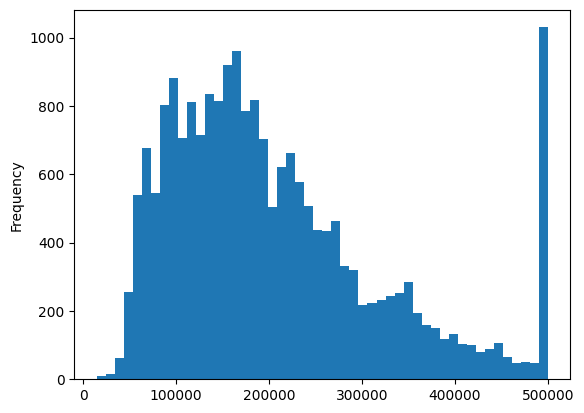

In [40]:
# plot a histogram of the median_house_value
data["median_house_value"].plot.hist(bins=50)
plt.show()

Now that was unexpected! We need to investigate further. When we sort the data in order of decreasing value and take a look at the first 100 rows...


In [43]:
data.sort_values("median_house_value", ascending=False).head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20341,-118.94,34.24,5,10018,1233.0,4253,1120,8.9063,500001.0,<1H OCEAN
20449,-118.85,34.27,50,187,33.0,130,35,3.3438,500001.0,<1H OCEAN
20442,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001.0,<1H OCEAN
3545,-118.57,34.27,20,7384,845.0,2795,872,9.6047,500001.0,<1H OCEAN
3559,-118.56,34.25,31,1962,243.0,697,242,8.5650,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
18466,-121.76,37.26,17,250,52.0,141,51,4.6458,500001.0,<1H OCEAN
18469,-121.74,37.19,11,1290,197.0,881,191,4.2039,500001.0,<1H OCEAN
4262,-118.34,34.10,29,3193,1452.0,2039,1265,1.8209,500001.0,<1H OCEAN
4322,-118.34,34.08,52,1430,186.0,547,178,10.3661,500001.0,<1H OCEAN


We see that the median house value 500,001 dominates in the tail. How many entries with this value do we have exactly?


In [44]:
data[data["median_house_value"] == 500001].shape

(965, 10)

965 records!! That is...


In [46]:
len(data[data["median_house_value"] == 500001]) / len(data) * 100

4.675614128591501

Roughly 5% of the entire dataset! What could be hapenning here is either there is an error in the data entry process or much more likely, the column has already been capped. Meaning there were probably districts with _much_ higher median prices that were skewing the data too much and whoever made this dataset decided to enforce a cap on the values to keep things reasonable.  
Either way... What should we do with these rows? Well, as always that's a matter of expert opinion! We could take the data as it is or we could drop these and lose 5% of the data which is not insignificant. In the next video and demo we'll talk about feature scaling, which might also be helpful here.


In [48]:
# Save the cleaned data to be used in the next demo
data.to_csv("cali_housing_modified_cleaned.csv", index=False)